In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
def update (N, T, v, w, u, r, delta_v, delta, alpha): 
    for n in range(N):  
        for t in range(1,T):
            for tau in range(t):
                v[t,n] += w[tau] * u[t-tau]
            delta_v[t,n] = v[t, n] - v[t-1,n]
            delta[t, n] = r[t] + delta_v[t,n]
            for tau in range (0,t):
                w[tau] += alpha * delta[t,n] * u[t - tau-1]
    return v, w, delta_v, delta

In [170]:
def generate_gaussian_rewards(mu, sigma, total_reward, T):
    r = np.zeros(T)
    for mu_v, sigma_V, total_r in zip(mu, sigma, total_reward):
        time_axis = np.arange(T)
        gaussian_values = total_r / (sigma_V * np.sqrt(2 * np.pi)) * np.exp(-(time_axis - mu_v)**2 / (2 * sigma_V**2))
        r += gaussian_values

    return r

In [171]:
def generate_stochastic_rewards(T):
    r = np.zeros(T)
    variables = [np.random.uniform(0,0.7) if t in range(200,220) else 0 for t in range(T)]
    r[:len(variables)]+= variables

    return r

In [172]:
# Initialize variables
T = 250
N = 900
t_stimulus = 100
alpha = 0.5

# Stimulus
u = np.zeros(T)
u[t_stimulus] = 1
#u[75] = 1
#u[50] = 1

#Reward
sigma = [2]
mu = [200]
total_reward = [2]
r = generate_gaussian_rewards(mu, sigma, total_reward, T)
#r = generate_stochastic_rewards(T)

# Initialize predictions, weights and deltas
v = np.zeros((T,  N))
w = np.zeros(T)
delta = np.zeros((T, N))
delta_v = np.zeros((T, N))

# Update predictions, weights and deltas
v, w, delta_v, delta = update(N, T, v, w, u, r, delta_v, delta, alpha)


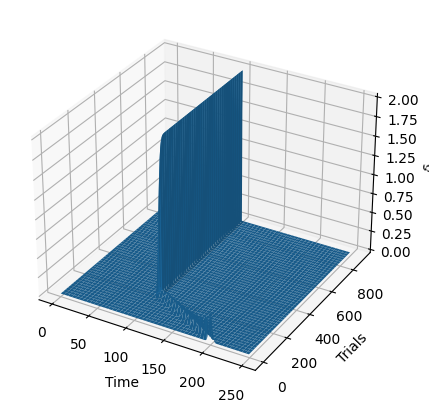

In [173]:
# Plot 1
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(range(T), np.arange(N))

ax.plot_surface(X, Y, delta.T)
ax.set_xlabel('Time')
ax.set_ylabel('Trials')
ax.set_zlabel('$\delta$')
plt.show()

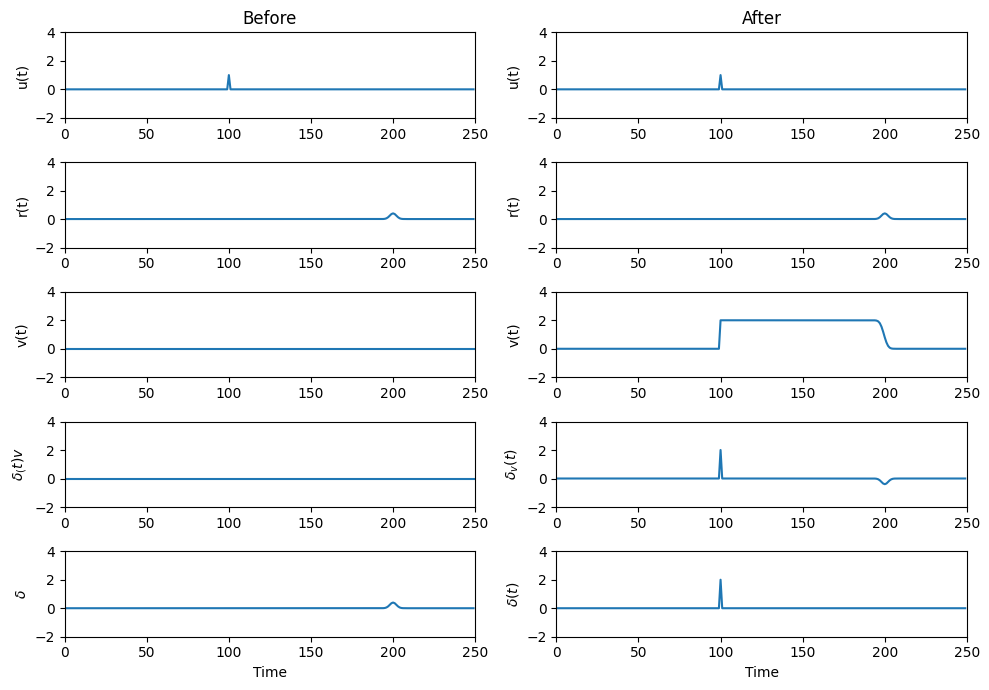

In [174]:
# Plot 2
fig, ax = plt.subplots(nrows= 5, ncols=2,figsize = (10,7) )

# Before
ax[0][0].plot(range(0,T), u)
ax[0][0].set_ylabel('u(t)')
ax[1][0].plot(range(0,T), r)
ax[1][0].set_ylabel('r(t)')
ax[2][0].plot(range(0,T), v[:,0])
ax[2][0].set_ylabel('v(t)')
ax[3][0].plot(range(0,T), delta_v[:,0])
ax[3][0].set_ylabel('$\delta_(t)v$')
ax[4][0].plot(range(0,T), delta[:,0]) 
ax[4][0].set_ylabel('$\delta$')
ax[4][0].set_xlabel('Time')
ax[0][0].title.set_text('Before')

# After
ax[0][1].plot(range(0,T), u)
ax[0][1].set_ylabel('u(t)')
ax[1][1].plot(range(0,T), r)
ax[1][1].set_ylabel('r(t)')
ax[2][1].plot(range(0,T), v[:, N-1])
ax[2][1].set_ylabel('v(t)')
ax[3][1].plot(range(0,T), delta_v[:, N-1])
ax[3][1].set_ylabel('$\delta_v(t)$')
ax[4][1].plot(range(0,T), delta[:,N-1]) 
ax[4][1].set_ylabel('$\delta(t)$')
ax[4][1].set_xlabel('Time')
ax[0][1].title.set_text('After')


plt.setp(ax, xlim=[0,T], ylim=[-2,4])
plt.tight_layout()
plt.show()